# **Практика "Обработка данных в Python"**


# Задача 1. Геокодинг
Напишите программу, которая принимает адрес от пользователя и возвращает его географические координаты (широту и долготу). Если адрес не найден, программа должна выводить сообщение об ошибке.

In [15]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent='email')
address = 'улица Несуществующая, 1'


def get_data(address):
  try:
    location = geolocator.geocode(address)
    print((location.latitude, location.longitude))
  except:
    print('Такого адреса нет в базе данных.')


get_data(address)

Такого адреса нет в базе данных.


# Задача 2. Работа с датафреймом

Массив, который нам нужен, находится в открытом доступе. Найти его можно здесь: https://hubofdata.ru/dataset/crime-rate/resource/3d3c7a68-b047-48d2-94c0-54d01b1abb39

**Задание 2.1**

Создайте датафрейм из таблицы-массива.

Выведите описательные статистики по столбцам — количество значений, среднее, стандартное отклонение, минимум, квантили, максимум.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

df = pd.read_csv("file_path")

df.head(10)

,month,Total_crimes,Serious,Huge_damage,Ecological,Terrorism,Extremism,Murder,Harm_to_health,Rape,Theft,Vehicle_theft,Fraud_scam,Hooligan,Drugs,Weapons
0,01.01.2003,214587.0,88203.0,20162.0,1216.0,630.0,13.0,2749.0,5559.0,574.0,81014.0,3549.0,7731.0,10560.0,16006.0,4661.0
1,01.02.2003,221928.0,88863.0,20889.0,1701.0,678.0,5.0,2444.0,4732.0,515.0,95970.0,3697.0,7607.0,10816.0,16839.0,5364.0
2,01.03.2003,248452.0,101349.0,24053.0,1817.0,809.0,10.0,2864.0,4851.0,560.0,79420.0,4327.0,9437.0,11813.0,20176.0,5938.0
3,01.04.2003,236299.0,91625.0,19754.0,2449.0,892.0,10.0,2919.0,4722.0,668.0,95215.0,5345.0,7824.0,12636.0,16614.0,5230.0
4,01.05.2003,230931.0,89615.0,17519.0,3530.0,796.0,20.0,2713.0,4895.0,688.0,94505.0,6374.0,7122.0,12234.0,14413.0,5112.0
5,01.06.2003,249710.0,97514.0,19351.0,3121.0,577.0,8.0,2685.0,4408.0,762.0,100154.0,7178.0,10507.0,11825.0,14659.0,5321.0
6,01.07.2003,225847.0,84698.0,14048.0,2340.0,425.0,13.0,2478.0,4814.0,791.0,100070.0,7282.0,5914.0,11152.0,11146.0,3803.0
7,01.08.2003,222107.0,84597.0,15578.0,2137.0,442.0,21.0,2472.0,4825.0,730.0,96690.0,7017.0,5687.0,10348.0,12868.0,4075.0
8,01.09.2003,240131.0,94677.0,18980.0,2542.0,752.0,7.0,2418.0,4598.0,761.0,101031.0,6996.0,7997.0,10566.0,14784.0,4397.0
9,01.10.2003,245711.0,92437.0,17943.0,1898.0,993.0,32.0,2679.0,5021.0,785.0,108788.0,7652.0,5935.0,11762.0,15052.0,4264.0


In [4]:
df.describe()

,Total_crimes,Serious,Huge_damage,Ecological,Terrorism,Extremism,Murder,Harm_to_health,Rape,Theft,Vehicle_theft,Fraud_scam,Hooligan,Drugs,Weapons
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,221279.019512,59068.487805,38402.039024,2592.463415,197.839024,59.473171,1451.400000,3276.024390,463.580488,92647.560976,4101.414634,15277.834146,1457.648780,17644.356098,2525.019512
std,51720.759692,20501.515982,20755.286960,1028.101551,245.462645,42.070500,687.713793,1013.861819,188.413369,25376.346430,1565.682727,4114.474680,2560.889194,3068.123707,733.169890
min,137657.000000,15755.000000,7424.000000,1216.000000,12.000000,2.000000,534.000000,1467.000000,134.000000,50155.000000,1092.000000,5687.000000,132.000000,7275.000000,1637.000000
25%,180711.000000,42135.000000,21813.000000,1888.000000,57.000000,26.000000,932.000000,2479.000000,322.000000,72533.000000,2928.000000,12481.000000,261.000000,16006.000000,2029.000000
50%,207550.000000,51426.000000,26357.000000,2322.000000,103.000000,52.000000,1200.000000,3256.000000,419.000000,88095.000000,3923.000000,15303.000000,486.000000,17924.000000,2351.000000
75%,254352.000000,78407.000000,59282.000000,3034.000000,184.000000,87.000000,1975.000000,4152.000000,574.000000,107555.000000,5125.000000,18005.000000,1785.000000,19686.000000,2868.000000
max,359098.000000,108299.000000,87941.000000,6822.000000,1198.000000,174.000000,3099.000000,5578.000000,1027.000000,153394.000000,8251.000000,27980.000000,12636.000000,25187.000000,5938.000000


**Задание 2.2**

Постройте гистограмму, иллюстрирующую среднее количество каждого типа преступления за 2003 год.

Постройте диаграму рассеяния между переменными Ecological и Murder. Есть ли корреляция между переменными?

Сформулируйте разницу между гистограммой и диаграммой рассеяния. Какой тип данных используется, какова цель использования каждого графика?

C:\Users\fffkn\AppData\Local\Temp\ipykernel_6788\939003727.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdYlGn')


<BarContainer object of 14 artists>

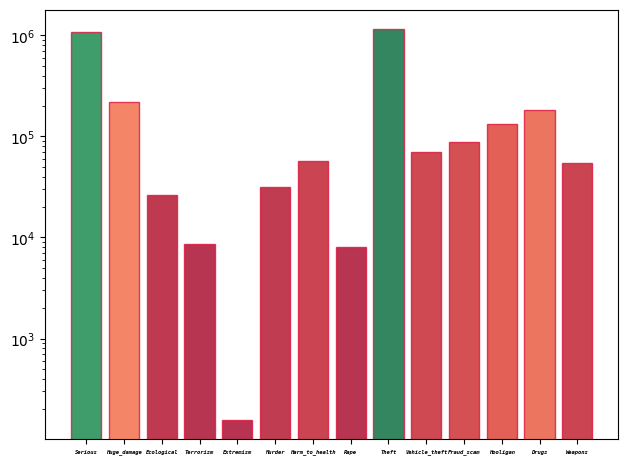

In [5]:
subset = df.iloc[:12]

groups = list(subset.columns[2:])
values = np.array([sum(subset[col]) for col in subset.columns[2:]])

norm = Normalize(vmin=min(values), vmax=max(values))
cmap = plt.cm.get_cmap('RdYlGn')
colors = cmap(norm(values))

plt.xticks(fontproperties=FontProperties(family='monospace',
style='italic', weight='heavy', size=4))

plt.tight_layout()
plt.bar(groups, values, alpha=0.8, color=colors,
edgecolor='crimson', linewidth=1, log = True)

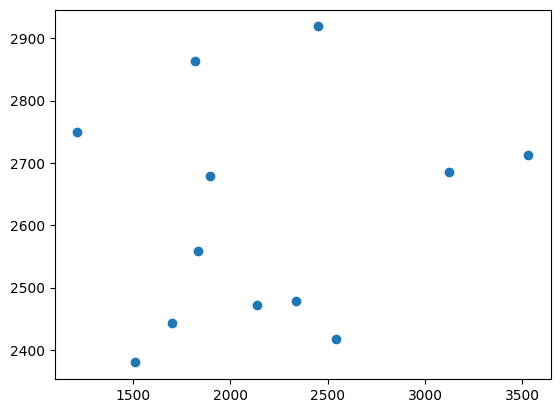

In [6]:
x = subset["Ecological"]
y = subset["Murder"]
plt.scatter(x, y)

<code>Solution:</code>

<h3>По результатам проверки гипотеза о корреляции между переменными не отвергается.</h3>

Гистограмма позволяет сравнить кластеризовать данные и сравнить их по группам, в то время как классическая точечная диаграмма предназначена для детального анализа и рассмотрения двух переменных

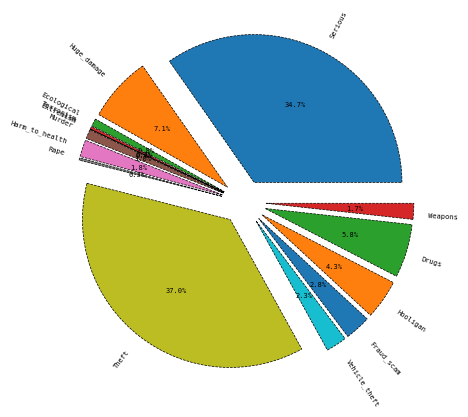

In [7]:
explode = [0.15] * len(values)

fs = {'fontfamily':'monospace', 'fontweight':'light', 'size':5}

plt.pie(values, labels=groups,explode=explode, textprops=fs, autopct='%1.1f%%', wedgeprops={'lw':0.5, 'ls':'--','edgecolor':'k'},
rotatelabels=True)

plt.show()

**Задание 2.3**

Сколько в выборке экологических преступлений? Какова их доля от общего числа преступлений?

In [8]:
print(sum(subset['Ecological']))

sum(subset['Ecological']) / sum(df.iloc[:12]["Total_crimes"])

26097.0


0.009467790935851789

**Задание 2.4**

Создайте таблицу, которая бы включала в себя только следующие столбики: Month, Total_crimes, Hooligan.

Создайте столбик "Level_of_hooligan_crimes", в котором, если количество преступлений выше среднего, будет выводиться значение "High", иначе - "Low".

Отсортируйте датафрейм по **убыванию** количества совершенных преступлений по статье "Хулиганство".

Оставьте только первые 10 строчек.

In [9]:
new_df = df[["month", "Total_crimes", "Hooligan"]]
new_df["Level_of_hooligan_crimes"] = ["High" if el > sum(new_df["Total_crimes"]) / len(new_df["Total_crimes"]) else "Low" for el in new_df["Total_crimes"]]

new_df = new_df.sort_values(by=["Hooligan"], ascending=False)

new_df.head(10)

C:\Users\fffkn\AppData\Local\Temp\ipykernel_6788\1738617985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Level_of_hooligan_crimes"] = ["High" if el > sum(new_df["Total_crimes"]) / len(new_df["Total_crimes"]) else "Low" for el in new_df["Total_crimes"]]


,month,Total_crimes,Hooligan,Level_of_hooligan_crimes
3,01.04.2003,236299.0,12636.0,High
4,01.05.2003,230931.0,12234.0,High
5,01.06.2003,249710.0,11825.0,High
2,01.03.2003,248452.0,11813.0,High
9,01.10.2003,245711.0,11762.0,High
10,01.11.2003,218480.0,11157.0,Low
6,01.07.2003,225847.0,11152.0,High
1,01.02.2003,221928.0,10816.0,High
8,01.09.2003,240131.0,10566.0,High
0,01.01.2003,214587.0,10560.0,Low


# Задача 3. Еще один массив

Для работы загрузите данные Росстата по рождаемости и бракам за 2022-2023 годы. Переименуйте первый столбец в каждом из файлов

In [ ]:
df1 = pd.read_excel("file_path")
df2 = pd.read_excel("file_path")

df1 = df1.rename(columns={"Таблица аналитическая" : "Регион"})
df2 = df2.rename(columns={"Таблица аналитическая" : "Регион"})

df1

,Регион,Родившиеся в 2023 (на тыс. населения),Родившиеся в 2022 (на тыс. населения),2023 г. в % к 2022 г.,Умершие в 2023 (на тыс. населения),Умершие в 2022 (на тыс. населения),2023 г. в % к 2022 г. .1,"Естественный прирост, убыль (-) в 2023 г.","Естественный прирост, убыль (-) в 2022 г."
0,Российская Федерация,8.7,8.9,97.8,12.0,13.0,92.3,-3.3,-4.1
1,Центральный федеральный округ,8.0,8.2,97.6,12.0,13.2,90.9,-4.0,-5.0
2,Белгородская область,6.6,7.1,93.0,13.4,14.2,94.4,-6.8,-7.1
3,Брянская область,6.9,7.2,95.8,14.3,15.7,91.1,-7.4,-8.5
4,Владимирская область,6.4,6.6,97.0,15.4,16.9,91.1,-9.0,-10.3
...,...,...,...,...,...,...,...,...,...
91,Амурская область,9.2,9.2,100.0,14.0,14.9,94.0,-4.8,-5.7
92,Магаданская область,8.2,8.7,94.3,12.1,12.6,96.0,-3.9,-3.9
93,Сахалинская область,10.0,10.7,93.5,13.4,13.8,97.1,-3.4,-3.1
94,Еврейская автономная область,9.1,9.6,94.8,14.3,15.2,94.1,-5.2,-5.6


**Задача 3.1**

Объедините массивы.

In [52]:
total_df = pd.merge(df1, df2)
total_df

,Регион,Родившиеся в 2023 (на тыс. населения),Родившиеся в 2022 (на тыс. населения),2023 г. в % к 2022 г.,Умершие в 2023 (на тыс. населения),Умершие в 2022 (на тыс. населения),2023 г. в % к 2022 г. .1,"Естественный прирост, убыль (-) в 2023 г.","Естественный прирост, убыль (-) в 2022 г.",Браки в 2023 (на тыс. населения),Браки в 2022 (на тыс. населения),2023 г. в % к 2022 г.,Разводы в 2023 (на тыс. населения),Разводы в 2022 (на тыс. населения),2023 г. в % к 2022 г. .1
0,Российская Федерация,8.7,8.9,97.8,12.0,13.0,92.3,-3.3,-4.1,6.5,7.2,90.3,4.7,4.7,100.000000
1,Центральный федеральный округ,8.0,8.2,97.6,12.0,13.2,90.9,-4.0,-5.0,6.5,7.4,87.8,4.2,4.2,100.000000
2,Белгородская область,6.6,7.1,93.0,13.4,14.2,94.4,-6.8,-7.1,6.7,7.4,90.5,4.2,4.3,97.674419
3,Брянская область,6.9,7.2,95.8,14.3,15.7,91.1,-7.4,-8.5,6.0,6.4,93.8,4.7,4.7,100.000000
4,Владимирская область,6.4,6.6,97.0,15.4,16.9,91.1,-9.0,-10.3,6.1,6.6,92.4,4.2,4.4,95.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Амурская область,9.2,9.2,100.0,14.0,14.9,94.0,-4.8,-5.7,7.8,9.9,78.8,6.5,6.3,103.174603
92,Магаданская область,8.2,8.7,94.3,12.1,12.6,96.0,-3.9,-3.9,7.6,9.2,82.6,5.6,5.1,109.803922
93,Сахалинская область,10.0,10.7,93.5,13.4,13.8,97.1,-3.4,-3.1,8.3,10.0,83.0,6.1,5.4,112.962963
94,Еврейская автономная область,9.1,9.6,94.8,14.3,15.2,94.1,-5.2,-5.6,7.6,9.0,84.4,6.6,7.0,94.285714


**Задача 3.2**

Сделайте решейпинг массива в long-format, группируя по рождаемости.
Остортируйте по первому столбцу и по годам.


In [31]:
df2.columns

Index(['Регион', 'Браки в 2023 (на тыс. населения)',
       'Браки в 2022 (на тыс. населения)', '2023 г. в  %  к 2022 г. ',
       'Разводы в 2023 (на тыс. населения)',
       'Разводы в 2022 (на тыс. населения)', '2023 г. в  %  к 2022 г. .1'],
      dtype='object')

In [55]:
df1 = df1.melt(id_vars=['Регион'], value_vars=['Родившиеся в 2023 (на тыс. населения)',
       'Родившиеся в 2022 (на тыс. населения)', '2023 г. в  %  к 2022 г. ',
       'Умершие в 2023 (на тыс. населения)',
       'Умершие в 2022 (на тыс. населения)', '2023 г. в  %  к 2022 г. .1',
       'Естественный прирост, убыль (-) в 2023 г.',
       'Естественный прирост, убыль (-) в 2022 г.'], var_name="Показатель", value_name="Значение")

df1

,Регион,Показатель,Значение
0,Российская Федерация,Родившиеся в 2023 (на тыс. населения),8.7
1,Центральный федеральный округ,Родившиеся в 2023 (на тыс. населения),8.0
2,Белгородская область,Родившиеся в 2023 (на тыс. населения),6.6
3,Брянская область,Родившиеся в 2023 (на тыс. населения),6.9
4,Владимирская область,Родившиеся в 2023 (на тыс. населения),6.4
...,...,...,...
763,Амурская область,"Естественный прирост, убыль (-) в 2022 г.",-5.7
764,Магаданская область,"Естественный прирост, убыль (-) в 2022 г.",-3.9
765,Сахалинская область,"Естественный прирост, убыль (-) в 2022 г.",-3.1
766,Еврейская автономная область,"Естественный прирост, убыль (-) в 2022 г.",-5.6


In [56]:
df1 = df1.sort_values(by = ['Регион', "Показатель"])
df1

,Регион,Показатель,Значение
242,Приволжский федеральный округ,2023 г. в % к 2022 г.,98.8
530,Приволжский федеральный округ,2023 г. в % к 2022 г. .1,95.6
722,Приволжский федеральный округ,"Естественный прирост, убыль (-) в 2022 г.",-5.4
626,Приволжский федеральный округ,"Естественный прирост, убыль (-) в 2023 г.",-4.9
146,Приволжский федеральный округ,Родившиеся в 2022 (на тыс. населения),8.2
...,...,...,...
617,г.Севастополь,"Естественный прирост, убыль (-) в 2023 г.",-3.4
137,г.Севастополь,Родившиеся в 2022 (на тыс. населения),7.3
41,г.Севастополь,Родившиеся в 2023 (на тыс. населения),6.7
425,г.Севастополь,Умершие в 2022 (на тыс. населения),11.4
